# Using Convolutional Neural Networks (VGG16)

By: Aris Budi Wibowo

## Basic Setup

First, we need to install Keras.

In [1]:
!pip2 install keras==1.2.2

    100% |################################| 184kB 585kB/s ta 0:00:01
  Running setup.py bdist_wheel for keras ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/f6/c5/63/97d96b41bf822858027c70b04448c19deaccf1cf518148fa82
Successfully built keras


Now, we configure Keras to use Theano as default configuration. We can change it to Tensorflow if we want.

In [2]:
!mkdir -p ~/.keras
!echo '{"epsilon":1e-07,"floatx":"float32","backend":"theano","img_dim_ordering":"th"}' > ~/.keras/keras.json

Now, we are done setup Keras. Next, we restart the kernel to make Keras use the configuration that we want.

Because we want to show plots too, we need to add extra configuration in Jupyter.

In [1]:
%matplotlib inline

Define path of the data.

In [4]:
#path = "/datasets/fast.ai/dogscats/"
#path = "D:/datasets/dogscats/"
path = "D:/datasets/dogscats/sample/"

Next, we import libraries that we will use later.

In [5]:
from __future__ import division,print_function

import os,json
from glob import glob
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
from matplotlib import pyplot as plt

For convenience, we already have some functions that we will use later.

In [6]:
import utils; reload(utils)
from utils import plots

## Using Pretrained VGG Model

Now, for simplification, we just need 7 lines of code to classify cats and dogs photos. For using VGG, we already have pretrained model. So now we just load the model.

In [5]:
batch_size = 16

In [7]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [8]:
vgg = Vgg16()

In [9]:
batches = vgg.get_batches(path+'train',batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)
vgg.finetune(batches)
vgg.fit(batches,val_batches,nb_epoch=10)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Epoch 1/10
16/16 [==============================] - 3s - loss: 1.3591 - acc: 0.5625 - val_loss: 0.9202 - val_acc: 0.5000
Epoch 2/10
16/16 [==============================] - 2s - loss: 0.4780 - acc: 0.8125 - val_loss: 0.5830 - val_acc: 0.6250
Epoch 3/10
16/16 [==============================] - 2s - loss: 0.3025 - acc: 0.8125 - val_loss: 0.4653 - val_acc: 0.6250
Epoch 4/10
16/16 [==============================] - 2s - loss: 0.1158 - acc: 1.0000 - val_loss: 0.3894 - val_acc: 0.7500
Epoch 5/10
16/16 [==============================] - 2s - loss: 0.0614 - acc: 0.9375 - val_loss: 0.3377 - val_acc: 0.8750
Epoch 6/10
16/16 [==============================] - 2s - loss: 0.2752 - acc: 0.8750 - val_loss: 0.3061 - val_acc: 0.8750
Epoch 7/10
16/16 [==============================] - 2s - loss: 0.0223 - acc: 1.0000 - val_loss: 0.3000 - val_acc: 0.8750
Epoch 8/10
16/16 [==============================] - 2s - loss: 0.0460 - ac

If you want to understand what is batch and epoch, you can read [here](https://stats.stackexchange.com/a/164875).

Not that bad in performance since we have limited data. :) If you curious, you can use all dogs vs cats data (approx. 25000 train data vs 15000 test data) and get 97% in accuracy with only 1 epoch.

## Breakdown the Process, Step by Step

### For Basic Image Recognition

We will try to use VGG16 to recognise categories from ImageNet from each image. Means, we just want to know each type of breed, not necessesarily guess dog or cat (since the model are not capable to do that because ImageNet don't have 'cat' or 'dog' category). First, we load the object.

In [10]:
vgg = Vgg16()

Now, we grab batches from our training data.

In [10]:
path = "D:/datasets/dogscats/"

In [12]:
batches = vgg.get_batches(path+'train',batch_size=4)

Found 23000 images belonging to 2 classes.


In [13]:
imgs, labels = next(batches)

Now, we want to know images that we grabbed before.

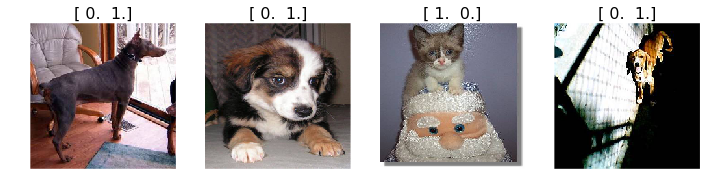

In [14]:
plots(imgs, titles=labels)

Let's predict the species of each image.

In [15]:
vgg.predict(imgs,True)

(array([ 0.4813,  0.1488,  0.2255,  0.2532], dtype=float32),
 array([237, 239, 284, 166], dtype=int64),
 [u'miniature_pinscher',
  u'Bernese_mountain_dog',
  u'Siamese_cat',
  u'Walker_hound'])

The category indexes are based on VGG model from ImageNet. If we want to know the first four of that categories:

In [16]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

### Use VGG16 to finetune Cats vs Dogs Model

Now, we will try to specifically using VGG16 for classify dogs and cats images. Because by default VGG16 was trained using ImageNet, we will use a technique called "finetuning". Finetuning is a process that use a pretrained model for second similiar task. [Source](http://wiki.fast.ai/index.php/Fine_tuning)

First, we setup batches. A batch is a subset of the training data. We need this to speed up training time and to control gpu memory usage.

In [12]:
batch_size=16

In [13]:
batches = vgg.get_batches(path+'train',batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid',batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Now, we call *finetune()* so the model can specifically train based on our 'cats vs dogs' data. 

In [14]:
vgg.finetune(batches)

Finally, we fit the model with our training data. We will predict data in batches either cats or dogs.

In [15]:
vgg.fit(batches,val_batches,nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 2588s - loss: 0.1555 - acc: 0.9687 - val_loss: 0.1239 - val_acc: 0.9810


Now we learned basic steps on how to use VGG16 for image recognition task. (ex: disease, paintings, etc.

Next, we will try to understand what's inside VGG16.

## Create VGG16 model from scratch with Keras (TODO: Complete this section)

### Model Setup

First, we import all the libraries that we need.

In [18]:
from numpy.random import random, permutation
from scipy import ndimage, misc
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image